In [1]:
import pandas as pd
import numpy as np
import gtda
from gtda.time_series import TakensEmbedding, SlidingWindow
from gtda.homology import VietorisRipsPersistence
import matplotlib.pyplot as plt
from gtda.diagrams import PersistenceEntropy,PersistenceLandscape,BettiCurve
from gudhi.wasserstein import wasserstein_distance
import gudhi
import ot
import multiprocessing
from functools import partial

In [12]:
def encontrar_minimo_global(distancias):
    minimo = min(distancias)
    indice_minimo = distancias.index(minimo)
    return minimo, indice_minimo

def wasserstein_distance1(diag1, diag2):
    """
    Calcula la distancia de Wasserstein entre dos diagramas de persistencia.
    Parámetros:
    diag1, diag2: numpy arrays de dimension (n, 2) donde n es el número de puntos en los diagramas.
                  Cada fila representa un punto en el diagrama de persistencia con la primera columna
                  representando la coordenada de nacimiento y la segunda columna la coordenada de muerte.
    Retorna:
    La distancia de Wasserstein entre los dos diagramas de persistencia.
    """
    # Crear el objeto Gudhi para calcular la distancia de Wasserstein.
    # Calcular la distancia de Wasserstein.
    dist = gudhi.wasserstein.wasserstein_distance(diag1, diag2)
    return dist
#Funcion para guardar la distancia de wassertein

def calcular_distancia_wasserstein(a, c, d, diagrams, i):
    return wasserstein_distance1(diagrams[a], diagrams[i])

def Guarda_distancias(a, c, d):
    """
    Guarda las distancias de wassertein en una lista 
    recibe a que es la coleccion 1 
    Parametros: (a,b) -> rango del conjunto [1] , (c,d)-> rango del conjunto [2] 
  
    Retorna:
    Una lista con las distancias de wassertein 
    """
    distancias = []
    # Crear un grupo de procesos
    pool = multiprocessing.Pool()
    # Crear una función parcial con los parámetros a, c y d fijados
    calcular_distancia_partial = partial(calcular_distancia_wasserstein, a, c, d, diagrams)
    # Calcular las distancias de forma paralela
    distancias = pool.map(calcular_distancia_partial, range(c, d))
    # Cerrar el grupo de procesos
    pool.close()
    # Esperar a que todos los procesos terminen
    pool.join()
    return distancias



def Generador_de_graficas(lista_de_distancias, nombre_imagen):
    # Plot the distances
    plt.plot(lista_de_distancias)
    plt.xlabel('Indice de distancias')
    plt.ylabel('Distancias de wassertein')
    plt.title('Distancias')
    plt.savefig(nombre_imagen, dpi=600)  # Save the graph with the provided name
    return plt.show()  # Display the graph


In [3]:
#Lectura de datos
df1 = pd.read_csv('BTCUSDT1m.csv')
df1.head()
df1['Close']
df1.describe
df1['Close timestamp']
close_ts = df1['Close'].to_numpy()
close_ts.shape
Time_ts = df1['Close time'].to_numpy()

In [4]:

#Analisis topologico
windows = SlidingWindow(size = 240,stride = 30)
sample =windows.fit_transform(close_ts)
sample.shape
#Encaje de takens
TE = TakensEmbedding(time_delay=1 ,dimension=3)
X_te = TE.fit_transform(sample)
X_te
#Vietoris Rips
VR = VietorisRipsPersistence(homology_dimensions=[0, 1,2],reduced_homology=False,n_jobs = -1)  # Parameter explained in the text
diagrams = VR.fit_transform(X_te)


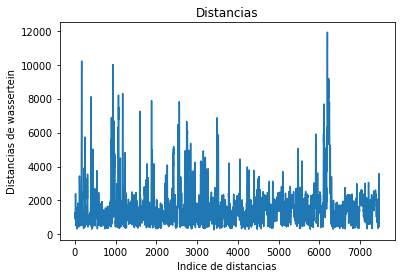

(266.9949618577957, 3414)

In [13]:
#Guardamos las graficas 
lista_de_distancias = Guarda_distancias(4,50,7526)
Generador_de_graficas(lista_de_distancias,'grafica_4-50-7526.png')
encontrar_minimo_global(lista_de_distancias)

In [18]:
#Guardamos las graficas 
lista_de_distancias = Guarda_distancias(4,5750,12250)
Generador_de_graficas(lista_de_distancias)


TypeError: Generador_de_graficas() missing 1 required positional argument: 'nombre_imagen'

In [16]:
diagrams.shape

(13961, 354, 3)